<a href="https://colab.research.google.com/github/Demon-2-Angel/Using-NTL-SAR-Data-Enhanicing-the-Image-Quality/blob/main/Space_Hackathon_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python matplotlib

# Importing Libraries


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Path to the File

In [ ]:
image_path = "/content/drive/MyDrive/Space Hackathon/Dataset/LC09_L2SP_146040_20231008_20231009_02_T1_SR_B3.TIF"
plt.show(image_path)

# Reading the TIFF Image

Trying to figure out Canny Edge Detection

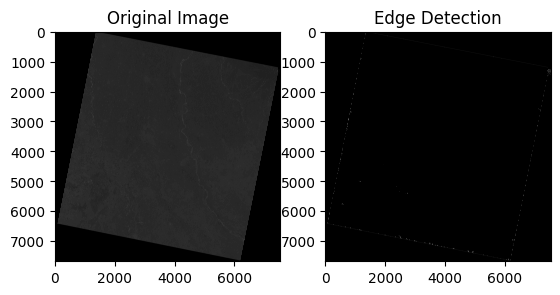

In [ ]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(image, 10, 200)  # You can adjust the parameters (thresholds) as needed

# Display the original and edge-detected images using matplotlib
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
plt.show()


# Data Preprocessing

## Histogram Equalization

In [ ]:
image_equalized = cv2.equalizeHist(image)

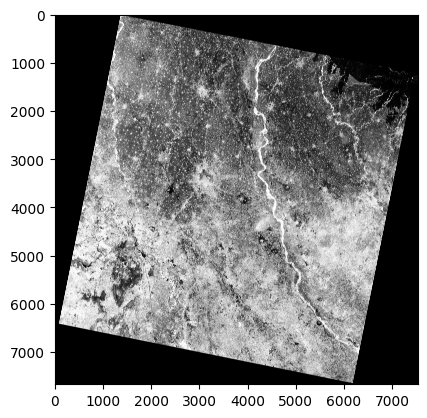

In [ ]:
plt.imshow(image_equalized, cmap='gray')
plt.show()

## Comaprision of Images

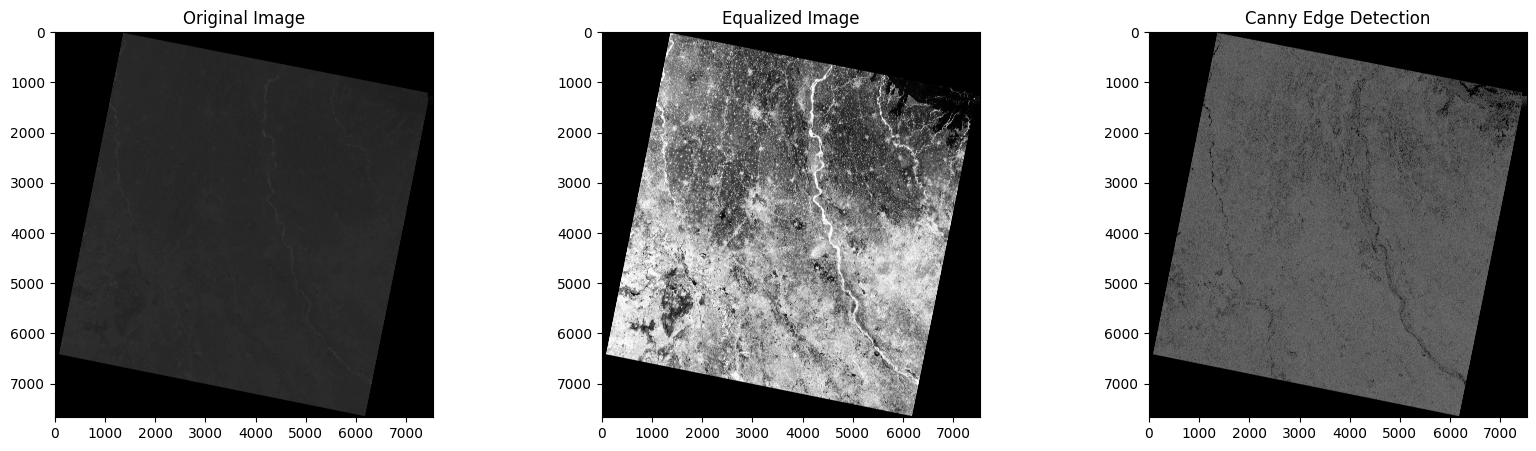

In [ ]:

# Apply Canny edge detection
edges = cv2.Canny(image_equalized, 1, 10)  # You can adjust the parameters (thresholds) as needed

# Display the original and edge-detected images using matplotlib
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(image_equalized, cmap='gray')
plt.title('Equalized Image')

plt.subplot(133)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.show()

## CLAHE & Histogram Equalization

Text(0.5, 1.0, 'Equalized Image')

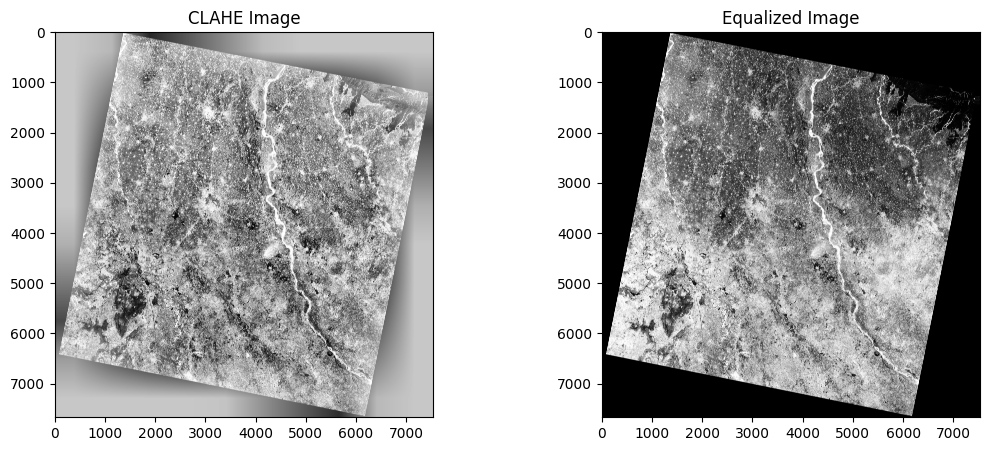

In [ ]:
# Apply adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=200.0, tileGridSize=(10, 10))
image_clahe = clahe.apply(image_equalized)

plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.imshow(image_clahe, cmap='gray')
plt.title('CLAHE Image')

plt.subplot(132)
plt.imshow(image_equalized, cmap='gray')
plt.title('Equalized Image')


Text(0.5, 1.0, 'CLAHE Image')

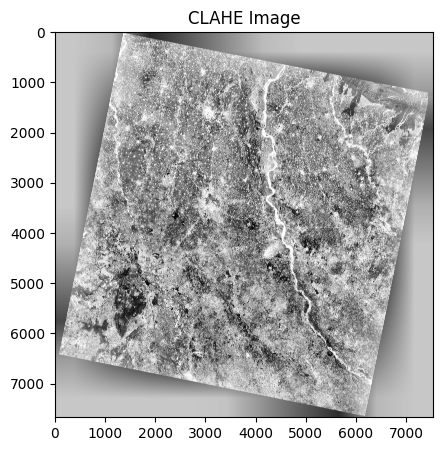

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(image_clahe, cmap='gray')
plt.title('CLAHE Image')

## Applying Gamma Correction & Testing with Different Values

In [ ]:
# Apply gamma correction
gamma = 1.5
image_gamma = ((image_clahe / 255.0) ** gamma * 255).astype('uint8')

gamma2 = 3
image_gamma2 = ((image_clahe / 255.0) ** gamma2 * 255).astype('uint8')

gamma3 = 5
image_gamma3 = ((image_clahe / 255.0) ** gamma3 * 255).astype('uint8')

Text(0.5, 1.0, 'Gamma 3 corrected Image')

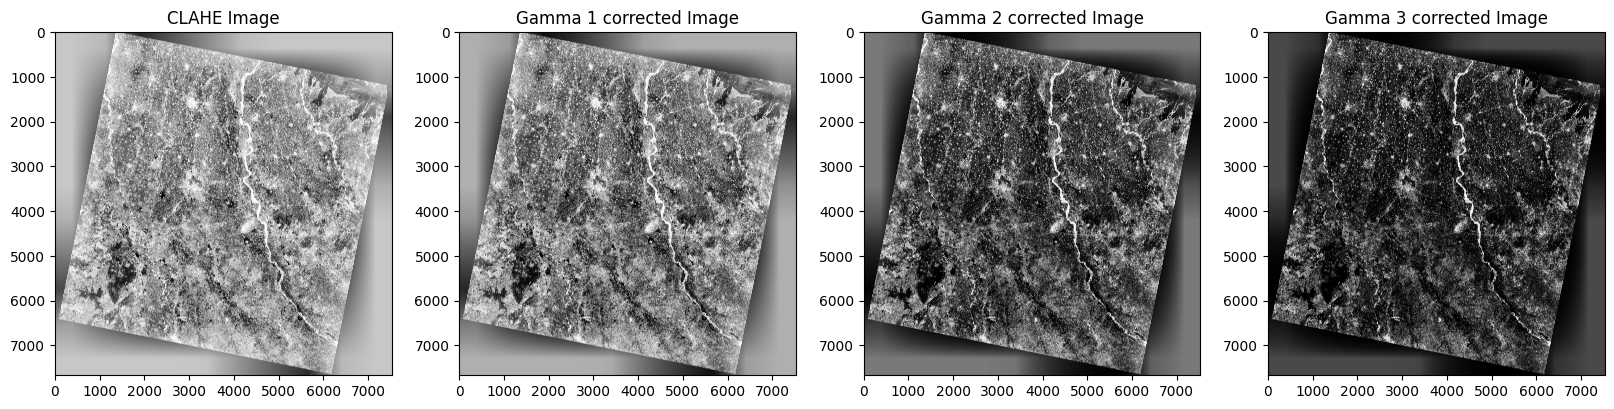

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(141)
plt.imshow(image_clahe, cmap='gray')
plt.title('CLAHE Image')

plt.subplot(142)
plt.imshow(image_gamma, cmap='gray')
plt.title('Gamma 1 corrected Image')

plt.subplot(143)
plt.imshow(image_gamma2, cmap='gray')
plt.title('Gamma 2 corrected Image')

plt.subplot(144)
plt.imshow(image_gamma3, cmap='gray')
plt.title('Gamma 3 corrected Image')


Text(0.5, 1.0, 'Gamma 2 corrected Image')

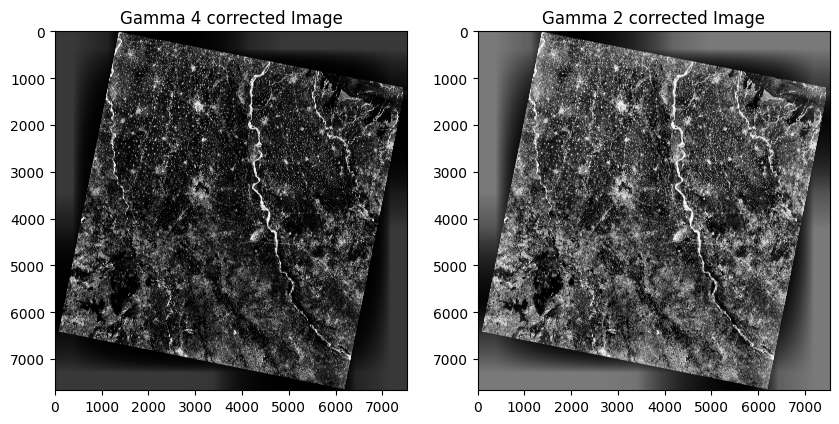

In [ ]:
gamma4 = 6
image_gamma4 = ((image_clahe / 255.0) ** gamma4 * 255).astype('uint8')

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image_gamma4, cmap='gray')
plt.title('Gamma 4 corrected Image')

plt.subplot(122)
plt.imshow(image_gamma2, cmap='gray')
plt.title('Gamma 2 corrected Image')

## Gussian Blur Filter & Bilateral Filter

Text(0.5, 1.0, 'Image Filtered 2 - Bilateral Filter')

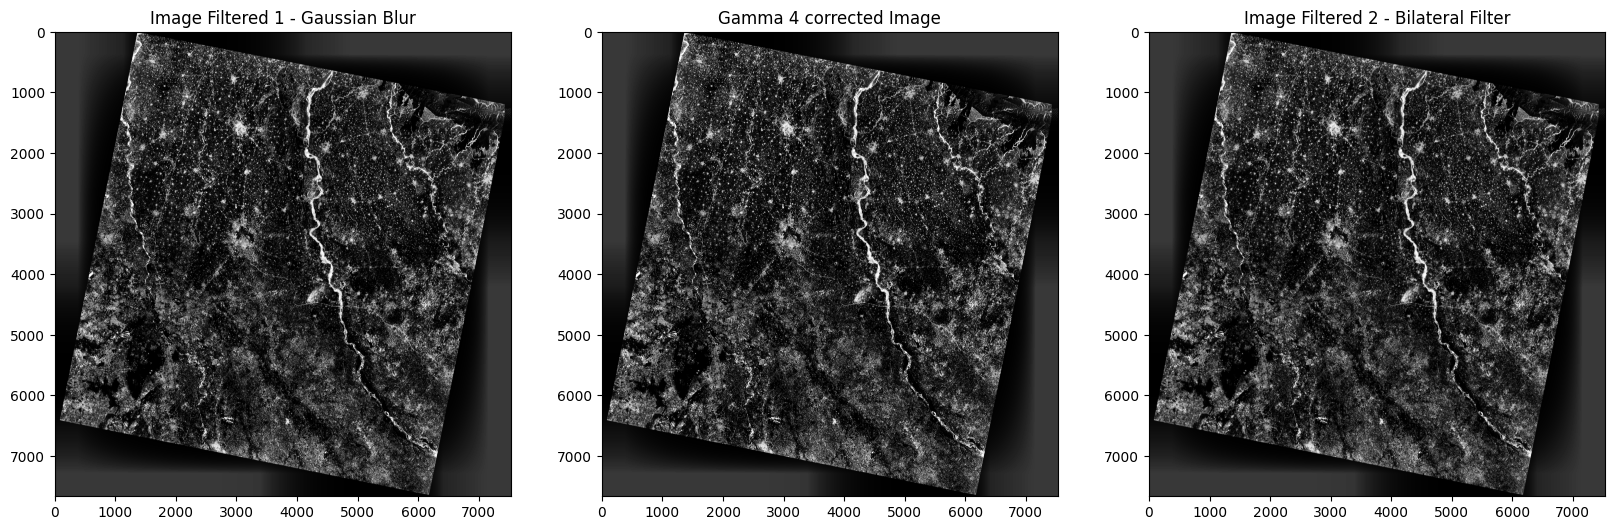

In [ ]:
# Apply Gaussian filter

image_filtered = cv2.GaussianBlur(image_gamma4, (11, 11), 0)
image_filtered2 = cv2.bilateralFilter(image_filtered, 9, 75, 75)

plt.figure(figsize=(20, 10))

plt.subplot(131)
plt.imshow(image_filtered, cmap='gray')
plt.title('Image Filtered 1 - Gaussian Blur')

plt.subplot(132)
plt.imshow(image_gamma4, cmap='gray')
plt.title('Gamma 4 corrected Image')

plt.subplot(133)
plt.imshow(image_filtered2, cmap='gray')
plt.title('Image Filtered 2 - Bilateral Filter')

## Sobel Filter and Comaparision

Text(0.5, 1.0, 'Image Filtered 3 - Sobel Filter')

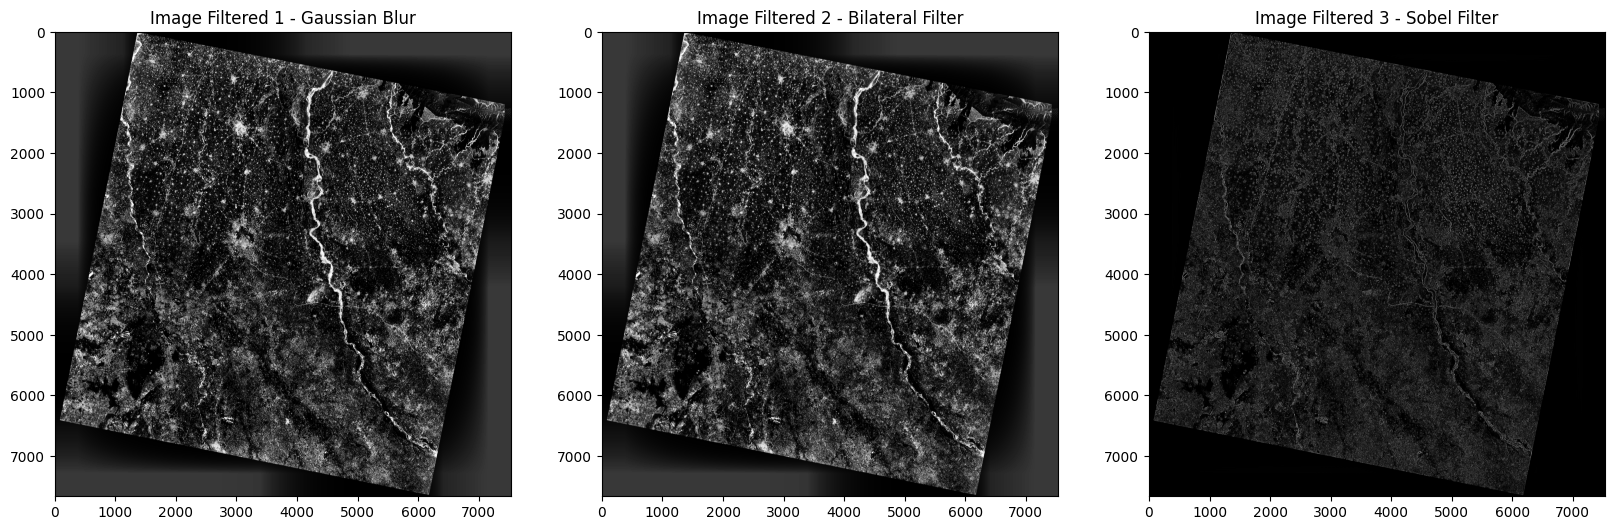

In [ ]:
sobel_x = cv2.Sobel(image_filtered2, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_filtered2, cv2.CV_64F, 0, 1, ksize=3)
image_filtered3 = cv2.magnitude(sobel_x, sobel_y)

plt.figure(figsize=(20, 10))

plt.subplot(131)
plt.imshow(image_filtered, cmap='gray')
plt.title('Image Filtered 1 - Gaussian Blur')

plt.subplot(132)
plt.imshow(image_filtered2, cmap='gray')
plt.title('Image Filtered 2 - Bilateral Filter')

plt.subplot(133)
plt.imshow(image_filtered3, cmap='gray')
plt.title('Image Filtered 3 - Sobel Filter')

## Scharr Filter

Text(0.5, 1.0, 'Image Filtered 4- Scharr')

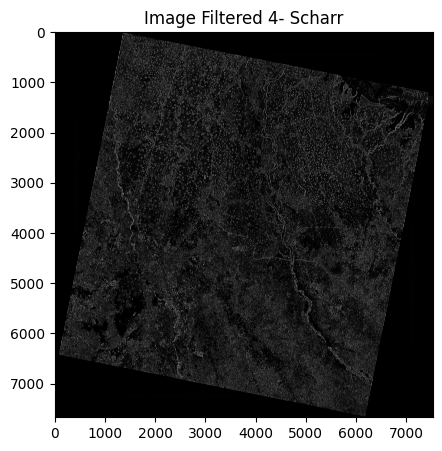

In [ ]:
# Apply Scharr filter
scharr_x = cv2.Scharr(image_filtered2, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(image_filtered2, cv2.CV_64F, 0, 1)
image_filtered4 = cv2.magnitude(scharr_x, scharr_y)

plt.figure(figsize=(10, 5))
plt.imshow(image_filtered4, cmap='gray')
plt.title('Image Filtered 4- Scharr')

## Canny Edge Detection After all of these Filter

In [ ]:
image_filtered_uint8 = np.uint8(image_filtered)
image_filtered2_uint8 = np.uint8(image_filtered2)
image_filtered3_uint8 = np.uint8(image_filtered3)
image_filtered4_uint8 = np.uint8(image_filtered4)
image_gamma4_uint8 = np.uint8(image_gamma4)

# Apply Canny edge detection
edges_Gaussian = cv2.Canny(image_filtered_uint8, 10, 200)
edges_Bilateral = cv2.Canny(image_filtered2_uint8, 10, 200)
edges_Sobel = cv2.Canny(image_filtered3_uint8, 10, 200)
edges_Scharr = cv2.Canny(image_filtered4_uint8, 10, 200)
edges_Gamma = cv2.Canny(image_gamma4_uint8, 10, 200)

Text(0.5, 1.0, 'Canny Edge Detection - Gamma Filter')

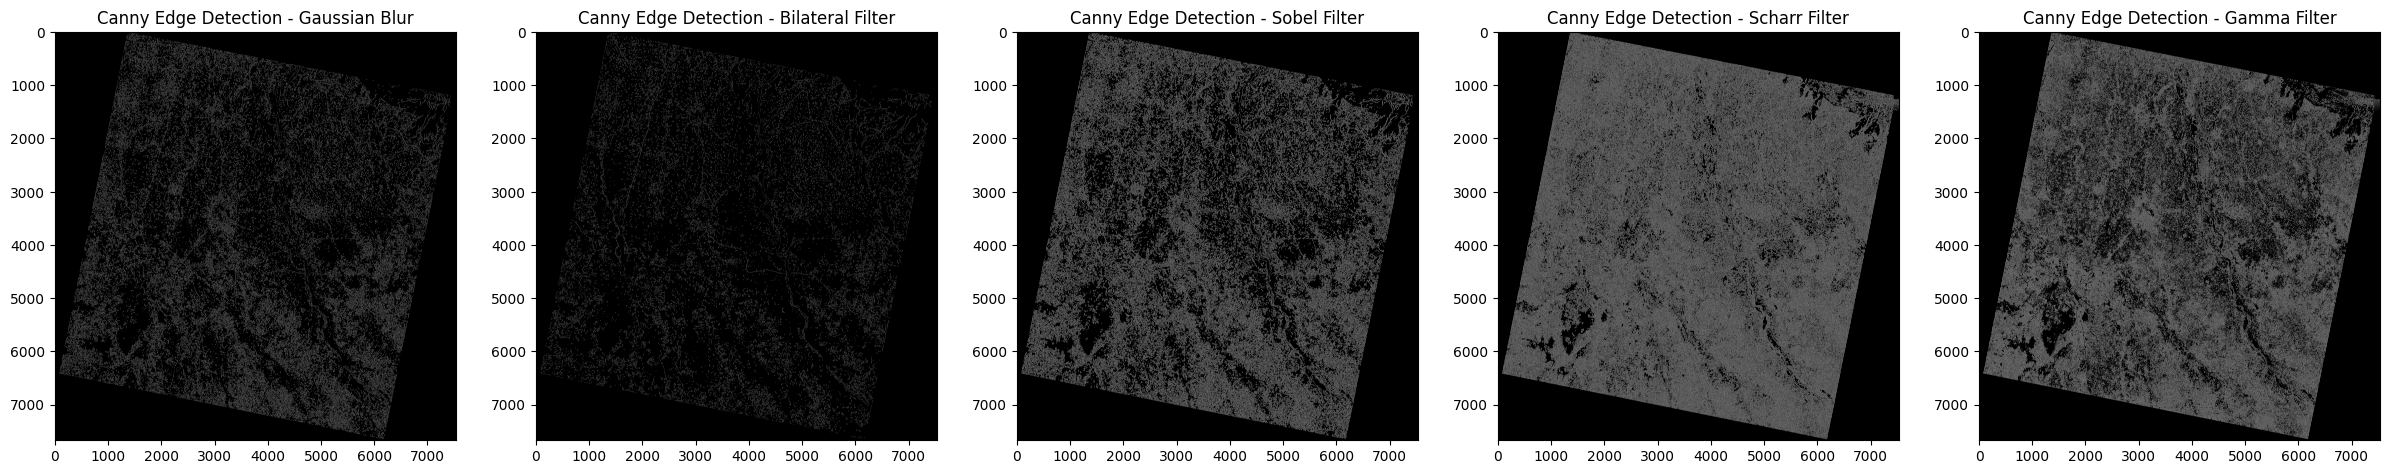

In [ ]:
plt.figure(figsize=(30, 20))

plt.subplot(151)
plt.imshow(edges_Gaussian, cmap='gray')
plt.title('Canny Edge Detection - Gaussian Blur')

plt.subplot(152)
plt.imshow(edges_Bilateral, cmap='gray')
plt.title('Canny Edge Detection - Bilateral Filter')

plt.subplot(153)
plt.imshow(edges_Sobel, cmap='gray')
plt.title('Canny Edge Detection - Sobel Filter')

plt.subplot(154)
plt.imshow(edges_Scharr, cmap='gray')
plt.title('Canny Edge Detection - Scharr Filter')

plt.subplot(155)
plt.imshow(edges_Gamma, cmap='gray')
plt.title('Canny Edge Detection - Gamma Filter')

In [ ]:
3d mapping -> 2d projection to 3d projection

SyntaxError: invalid decimal literal (<ipython-input-1-1e90ae6e48c9>, line 1)